# Non-Negative Matrix Factorization
1. Helps extract usefull info
1. Used in dimensionality Reduction
1. The process of decomposing data into a non-negative weighted sum is particularly helpful for data that is created as the addition (or overlay) of several independent sources, such as an audio track of multiple people speaking, or music with many instruments
1. NMF can identify the original components that make up the combined data
1. Overall, NMF leads to more interpretable components than PCA, as negative components and coefficients can lead to hard-to-interpret cancellation effects
1. NMF creates a component that points toward the mean, as pointing there best explains the data
1. Components in NMF are not ordered in any specific way, so there is no “first non-negative component”: all components play an equal part
1. NMF is usually not used for its ability to reconstruct or encode data, but rather for finding **interesting patterns** within the data

# Decomposition Methods
1. Principal Component Analysis (PCA)
1. Non-Negative Matrix Factorization (NMF)
1. Independent Component Analysis (ICA)
1. Factor Analysis (FA)
1. Sparse Coding (dictionary learning)

> http://scikit-learn.org/stable/modules/decomposition.html

In [37]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF

from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [4]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

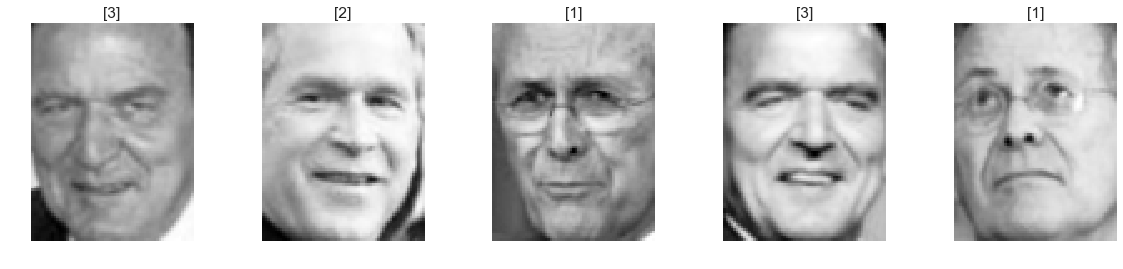

In [10]:
sns.set_context('talk')

plt.figure(figsize = (20, 4))

for i, (image, label) in enumerate(zip(people.images[:5, :], people.target[:5])):
    plt.subplot(1, 5, i + 1).axis('off')
    plt.imshow(image, cmap = 'Greys_r')
    plt.title('[{}]'.format(label))

plt.show()

In [18]:
X, y = people.data, people.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [34]:
nmf = NMF(n_components=15, random_state=0)

In [35]:
X_train_nmf = nmf.fit_transform(X_train)
X_test_nmf = nmf.transform(X_test)

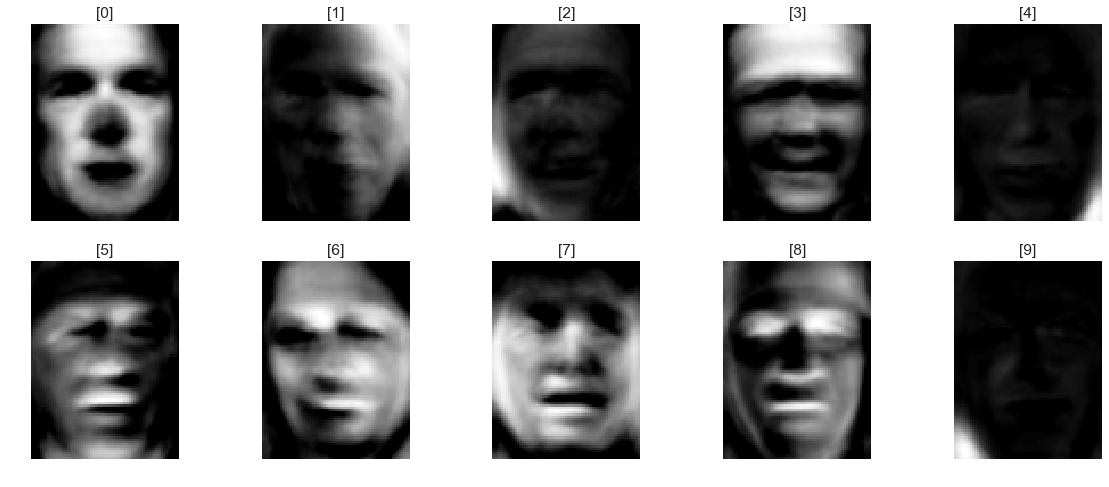

In [51]:
sns.set_context('talk')

plt.figure(figsize = (20, 8))

for i, image in enumerate(nmf.components_[:10]):
    plt.subplot(2, 5, i + 1).axis('off')
    plt.imshow(image.reshape(people.images.shape[1:]), cmap = 'Greys_r')
    plt.title(f'[{i}]')

plt.show()

# Observation
1. It seems the 6th component face is looking towards left, lets verify

In [52]:
inds = np.argsort(X_train_nmf[:, 6])[::-1]

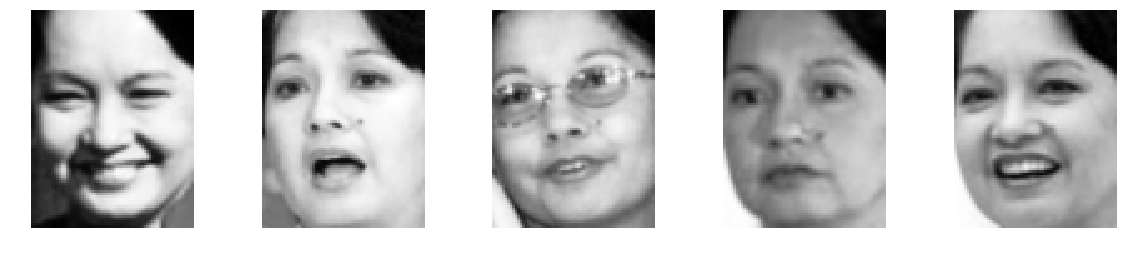

In [53]:
sns.set_context('talk')

plt.figure(figsize = (20, 4))

for i, ind in enumerate(inds[:5]):
    plt.subplot(1, 5, i + 1).axis('off')
    plt.imshow(np.reshape(X_train[ind],people.images.shape[1:]), cmap = 'Greys_r')

plt.show()